In [1]:
# Import libraries

import pandas as pd
import nltk
import gensim
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
from gensim.parsing.preprocessing import remove_stopwords
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

In [ ]:
# Load Dataset

df = pd.read_excel('../totalData/surface/total/totalSurface_prev_bin.xlsx')

# Select only posts predicted as High Relevanc
df = df[df['Relevância'] == 'Alta'].reset_index(drop=True)

In [63]:
df

,id,category,title,author,body,answers,created_at,year,quarter,full_text_ingles,probabilidade,Relevância,previsao_binaria
0,1,Vpn Vps Vds,\nWhat Is Vpn And Why You Need It\n,RedX,\n\n\n\n\n\n\t\t\tA virtual private network (V...,None,2022-06-23 06:08:00,2022,2,vpn need virtual private network vpn gives onl...,0.761471,Alta,1
1,16,Cyber Security - Training and Tutorials,How to become a Bug Bounty Hunter,Pentester,\nStep 1) Start reading!\nThere are some go-to...,None,2021-07-19 13:17:00,2021,3,become bug bounty hunter step start reading go...,0.934899,Alta,1
2,20,Tech - OS Related - Linux Flavors,RHEL/CentOS 8 shim kernel signatures,SysAdmin,\nDue to hardening within the Red Hat Enterpri...,None,2021-07-15 09:04:00,2021,3,rhel centos shim kernel signatures due hardeni...,0.773825,Alta,1
3,21,Construction Web,Best Backdoor Scanner,m1zz,Not sure if this is the right place but.. Is ...,"[{'id': 158, 'post_id': 21, 'author': 'Nova', ...",2020-10-26 07:27:00,2020,4,best backdoor scanner sure right place backdoo...,0.916977,Alta,1
4,21,Cyber Security - Cyber Security Tips,What's the Purpose of Hacking a Facebook Account,tasmin22,"\n\t\tCuriosity and Challenge\nFor some, hacki...",None,2023-08-30 11:35:00,2023,3,purpose hacking facebook account curiosity cha...,0.836677,Alta,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,18179,Leak Miscellaneous,Data Recovery Software for Windows 64 Bit Fre...,jay97,Data Recovery for Windows 8.1 is capable softw...,None,2015-09-18 05:00:00,2015,3,data recovery software windows bit free downlo...,0.704916,Alta,1
1846,18481,Leak Miscellaneous,18.02.2015 - E-Mail/Password dump #2,Aeux,Content locked This content has been locked....,"[{'id': 125087, 'post_id': 18481, 'author': 'M...",2015-02-18 14:15:00,2015,1,e mail password dump locked locked please logi...,0.890543,Alta,1
1847,18497,Leak Miscellaneous,18.02.2015 - E-Mail/Password dump (x18),Aeux,Content locked This content has been locked....,None,2015-02-18 14:14:00,2015,1,e mail password dump x locked locked please lo...,0.828891,Alta,1
1848,18498,Leak Miscellaneous,NGRP Mysql,HaVoK,"This is from two years ago, I leaked it to som...",None,2015-03-05 00:12:00,2015,1,ngrp mysql two years ago leaked friends emails...,0.801030,Alta,1


In [ ]:
#Remover novas stopwords portugues
#nltk.download('stopwords')
#stop_words = set(stopwords.words('portuguese'))
#stop_words.update(["pra","etc","none","vai","ter","nan","user","author","title","none","name",
#                     "score","content","down","votes","created","comments","comment","answercontent",
#                     "vote","type","points","aqui","pode","sobre","fazer","alguem","tudo","regular",
#                     "coisa","bem","vou","sei","boca","algum","alguns","alguma","algo","nada","bom",
#                     "entao","acho","quer","the","and","you","cara","coisas","sim","ainda","ver",
#                     "usar","assim","index","mano","nois","manolo","brodie","talvez","html","vcs",
#                     "de","a","o","que","e","do","da","em","um","para","e","com","nao","uma","os",
#                     "no","se","na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem",
#                     "a","seu","sua","ou","ser","quando","muito","ha","nos","ja","esta","eu","tambem",
#                     "so","pelo","pela","ate","isso","ela","entre","era","depois","sem","mesmo","aos",
#                     "ter","seus","quem","nas","me","esse","eles","estao","voce","tinha","foram",
#                     "essa","num","nem","suas","meu","as","minha","tem","numa","pelos","elas","havia",
#                     "seja","qual","sera","nos","tenho","lhe","deles","essas","esses","pelas","este",
#                     "fosse","dele","tu","te","voces","vos","lhes","meus","minhas","teu","tua","teus",
#                     "tuas","nosso","nossa","nossos","nossas","dela","delas","esta","estes","estas",
#                     "aquele","aquela","aqueles","aquelas","isto","aquilo","estou","esta","estamos",
#                     "estao","estive","esteve","estivemos","estiveram","estava","estavamos","estavam",
#                     "estivera","estiveramos","esteja","estejamos","estejam","estivesse","estivessemos",
#                     "estivessem","estiver","estivermos","estiverem","hei","ha","havemos","hao","houve",
#                     "houvemos","houveram","houvera","houveramos","haja","hajamos","hajam","houvesse",
#                     "houvessemos","houvessem","houver","houvermos","houverem","houverei","houvera",
#                     "houveremos","houverao","houveria","houveriamos","houveriam","sou","somos","sao",
#                     "era","eramos","eram","fui","foi","fomos","foram","fora","foramos","seja","sejamos",
#                     "sejam","fosse","fossemos","fossem","for","formos","forem","serei","sera","seremos",
#                     "serao","seria","seriamos","seriam","tenho","tem","temos","tem","tinha","tinhamos",
#                     "tinham","tive","teve","tivemos","tiveram","tivera","tiveramos","tenha","tenhamos",
#                     "tenham","tivesse","tivessemos","tivessem","tiver","tivermos","tiverem","terei",
#                     "tera","teremos","terao","teria","teriamos","teriam", "uns", "sempre", "pergunta",
#                     "text", "quarter", "year", "obrigado", "usando", "saber", "sabe", "melhor", 
#                     "quero", "caso", "dar", "conseguir", "comecar"
#                 ])


In [ ]:
# Remover novas stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.update(["etc", "none", "nan", "user", "author", "title", "none",
                    "name", "score", "content", "down", "votes", "created", 
                    "comments", "comment", "answercontent", "vote", "type",
                    "points",  "the", "and", "index", "z", "user", "e", "n",
                    "xa", "lol", "bro", "k", "nhttps", "com", "like", "c",
                    "f", "http", "b", "php", "v", "p", "h","tar","gz","u",
                    "r", "txt", "niflheim", "png", "use", "one", "post",
                    "hackonology", "answer", "body", "get", "also", "see",
                    "anyone", "forum", "showthread", "pid", "html", "q",
                    "g", "l", "co", "fi", "ibb", "nz",
                  ])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re

def preprocess_text_b(text):
    # Remove números (ex.: 2024)
    text = re.sub(r'\d+', '', text)
    # Remove pontuações e caracteres especiais
    text = re.sub(r'[^\w\s]', '', text)
    # Separa em tokens
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens]
    print("\nTexto original:", text)
    print("\nTexto sem stop:", " ".join(tokens))
    return tokens

# Aplica a função preprocess_text_b a cada documento e cria uma lista de listas de tokens
documents = [
    {
        'text': preprocess_text_b(row['full_text_ingles']),  # Texto pré-processado
        'quarter': row['quarter'],                   # Quarter
        'year': row['year']                          # Year
    }
    for _, row in df.iterrows()
]



Texto original: vpn need virtual private network vpn gives online privacy anonymity creating private network public internet connection vpns mask internet protocol ip address online actions virtually untraceable important vpn services establish secure encrypted connections provide greater privacy even secured wi fi hotspot need vpn service surfing web transacting unsecured wi fi network means could exposing private information browsing habits virtual private network better known vpn must anyone concerned online security privacy think times go reading emails line coffee shop checking bank account waiting doctor office unless logged private wi fi network requires password data transmitted online session could vulnerable eavesdropping strangers using network encryption anonymity vpn provides helps protect online activities sending emails shopping online paying bills vpns also help keep web browsing anonymous vpn protects ip address privacy vpns essentially create data tunnel local networ

Texto original: new chatgpt method make week guide cdn bunkr ru newblackhatmethod p nxycka pdf say chatgpt method timezone script exploit found coded chat gpt absolutely insane try find exploits write different javascripts bot far one ebook provided mind blowing method released days ago wonder much take g fix exploit got free img x data image gif base r lgodlhaqabapabap waaach baekaaaalaaaaaabaaeaaaicraeaow img b img x data image gif base r lgodlhaqabapabap waaach baekaaaalaaaaaabaaeaaaicraeaow img b download full tutorial cdn bunkr ru newblackhatmethod p nxycka pdf links encontrados ibb co drnjsm skc png ibb co jwvnngd screenshot chat gpt method make daily guide monetizing techniques png cdn bunkr ru newblackhatmethod p nxycka pdf cdn bunkr ru newblackhatmethod p nxycka pdf

Texto sem stop: new chatgpt method make week guide cdn bunkr ru newblackhatmethod nxycka pdf say chatgpt method timezone script exploit found coded chat gpt absolutely insane try find exploits write different java

Texto original: hackers substitute dns queries help poisoning cache domain name server spoofing dns cyberattack attacker directs victim traffic malicious site instead legitimate ip address attackers use method poisoning dns cache intercept internet traffic steal credentials confidential information dns cache poisoning dns spoofing identical concepts often used interchangeably hacker wants trick users entering personal data insecure site achieve using dns cache poisoning hacker substitutes replaces dns data specific site redirects victim attacker server instead legitimate server way hacker achieves goal wide range opportunities make phishing attack steal data even inject malware victim system dns spoofing cache poisoning start talking dns cache poisoning first let remember dns dns caching dns worldwide directory ip addresses domain names say kind telephone directory internet dns translates user friendly addresses varonis com ip addresses used computers work network dns caching system st

Texto original: cve exploiting authentication bypass vulnerability mysql mariadb news vulnerability mysql mariadb spreads like wild fire covered vulnerability e hacking news news article going share thing perspective penetration tester mysql mariadb versions c affected version vulnerability allows attacker access mysql database without inputing proper authentication credentials vulnerability exploited mysql built system memcmp function return values outside range according gokubchik gcc build memcmp bsd libc safe bu linux glibc sse optimised memcmp safe linux distros affected following systems vulnerable ubuntu linux bit opensuse bit mysql log debin unstable bit fedora arch linux order test vulnerability run followoing bash script seq mysql u root password bad h dev null done click expand code provide access affectte mysql server root user account following video provided one ehn reader exploiting using metasploit one metasploit contributor committee threaded brute force module abuses 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



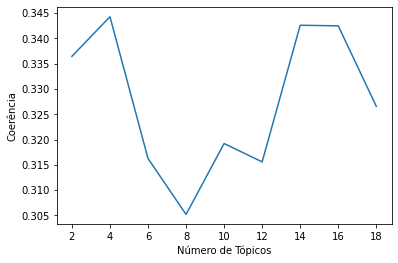

A quantidade de tópicos = 2  tem um valor de coerência de  0.3364
A quantidade de tópicos = 4  tem um valor de coerência de  0.3443
A quantidade de tópicos = 6  tem um valor de coerência de  0.3163
A quantidade de tópicos = 8  tem um valor de coerência de  0.3052
A quantidade de tópicos = 10  tem um valor de coerência de  0.3192
A quantidade de tópicos = 12  tem um valor de coerência de  0.3156
A quantidade de tópicos = 14  tem um valor de coerência de  0.3426
A quantidade de tópicos = 16  tem um valor de coerência de  0.3425
A quantidade de tópicos = 18  tem um valor de coerência de  0.3266


In [67]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Transform the list of documents into a list of lists of words
texts = [str(doc).split() for doc in documents]

# Create a dictionary with the words
dictionary = corpora.Dictionary(texts)

# Filter out rare words and stopwords
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create the corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Treinando o modelo LDA para diferentes números de tópicos
def compute_coherence(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Parâmetros
start = 2
limit = 20
step = 2

models, coherences = compute_coherence(dictionary, corpus, texts, start, limit, step)

# Visualizando coerência
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherences)
plt.xlabel("Número de Tópicos")
plt.ylabel("Coerência")

plt.savefig(f"../totalData/surface/total/coerencia.png", format='png')
plt.show()

# Lista dos valores de coerência, para melhor identificar o ponto de inflexão do gráfico
with open("../totalData/surface/total/coerenciaResultados.txt", "w", encoding="utf-8") as file:
    # Lista dos valores de coerência
    for m, cv in zip(x, coherences):
        file.write(f"A quantidade de tópicos = {m} tem um valor de coerência de {round(cv, 4)}\n")
        print("A quantidade de tópicos =", m, " tem um valor de coerência de ", round(cv, 4))


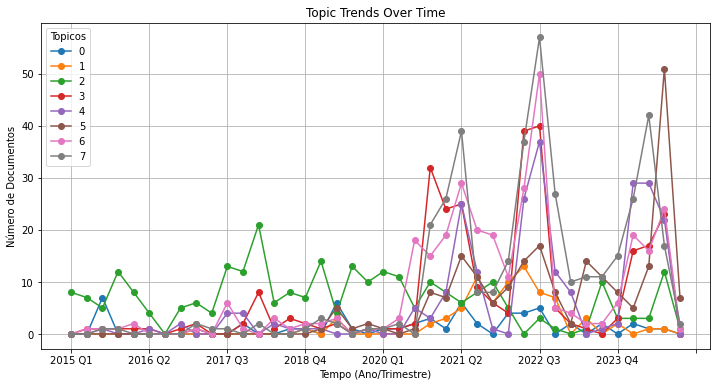


Tópico 0: 0.026*"'onion'," + 0.026*"'may'," + 0.018*"'sql'," + 0.011*"'exploit'," + 0.007*"'tools'," + 0.007*"'x'," + 0.007*"'system'," + 0.007*"'users'," + 0.007*"'stealer'," + 0.007*"'phisher',"


Tópico 1: 0.066*"'vzlom'," + 0.064*"'hacking'," + 0.022*"'hack'," + 0.019*"'vkontakte'," + 0.019*"'vzlomat'," + 0.017*"'mail'," + 0.013*"'order'," + 0.012*"'zakazat'," + 0.012*"'odnoklassniki'," + 0.011*"'ru',"


Tópico 2: 0.026*"'login'," + 0.021*"'nulledbb'," + 0.018*"'register'," + 0.016*"'locked'," + 0.015*"'thread'," + 0.014*"'thanks'," + 0.013*"'wrote'," + 0.013*"'leak'," + 0.012*"'please'," + 0.010*"'database',"


Tópico 3: 0.007*"'malware'," + 0.006*"'data'," + 0.006*"'server'," + 0.006*"'network'," + 0.006*"'attack'," + 0.006*"'system'," + 0.006*"'using'," + 0.006*"'security'," + 0.006*"'information'," + 0.005*"'used',"


Tópico 4: 0.008*"'tool'," + 0.008*"'target'," + 0.008*"'using'," + 0.008*"'exploit'," + 0.007*"'password'," + 0.007*"'github'," + 0.007*"'vulnerability'," + 0.00

Documentos do tópico 3: [(0, 2022, 2), (7, 2021, 3), (8, 2021, 3), (16, 2021, 1), (20, 2020, 4), (22, 2020, 4), (23, 2020, 4), (28, 2023, 4), (30, 2022, 2), (36, 2020, 3), (39, 2022, 3), (70, 2022, 2), (89, 2015, 2), (98, 2022, 2), (99, 2021, 4), (102, 2020, 4), (104, 2021, 4), (105, 2021, 2), (107, 2019, 2), (123, 2022, 1), (132, 2019, 1), (136, 2021, 3), (138, 2018, 3), (139, 2018, 4), (143, 2018, 1), (164, 2017, 4), (191, 2024, 3), (194, 2022, 1), (209, 2022, 4), (215, 2022, 2), (217, 2021, 1), (218, 2021, 3), (224, 2021, 2), (225, 2021, 2), (226, 2021, 2), (228, 2021, 2), (231, 2021, 1), (232, 2021, 1), (234, 2020, 4), (235, 2020, 4), (236, 2020, 4), (237, 2024, 3), (257, 2024, 3), (261, 2024, 2), (263, 2024, 2), (267, 2024, 2), (292, 2022, 3), (307, 2022, 3), (313, 2022, 3), (317, 2022, 2), (320, 2022, 2), (322, 2022, 2), (328, 2022, 2), (330, 2022, 2), (340, 2021, 2), (343, 2021, 1), (347, 2022, 1), (349, 2020, 4), (350, 2024, 3), (366, 2024, 2), (373, 2024, 2), (381, 2024, 1), (

Documentos do tópico 5: [(21, 2023, 2), (24, 2023, 2), (34, 2021, 2), (42, 2022, 4), (65, 2022, 1), (66, 2022, 2), (67, 2023, 3), (68, 2023, 2), (73, 2023, 3), (74, 2021, 1), (75, 2022, 3), (76, 2022, 3), (90, 2021, 4), (91, 2023, 3), (92, 2023, 2), (93, 2023, 1), (94, 2022, 4), (110, 2021, 3), (111, 2023, 3), (112, 2023, 3), (114, 2023, 3), (115, 2023, 2), (116, 2023, 2), (120, 2022, 1), (146, 2022, 2), (152, 2022, 3), (161, 2021, 2), (171, 2020, 4), (172, 2023, 3), (173, 2023, 2), (176, 2023, 2), (177, 2023, 2), (178, 2023, 2), (186, 2022, 3), (189, 2022, 3), (193, 2022, 1), (196, 2021, 1), (203, 2024, 2), (242, 2024, 3), (243, 2024, 3), (255, 2024, 2), (265, 2023, 3), (268, 2023, 3), (272, 2023, 4), (281, 2023, 2), (293, 2022, 3), (323, 2021, 2), (344, 2022, 2), (355, 2023, 4), (410, 2022, 3), (417, 2021, 2), (427, 2021, 1), (432, 2022, 4), (454, 2022, 3), (461, 2021, 3), (464, 2021, 3), (476, 2023, 2), (481, 2022, 3), (486, 2023, 1), (499, 2023, 3), (505, 2022, 1), (530, 2022, 1), 

Documentos do tópico 7: [(4, 2023, 3), (5, 2023, 2), (6, 2023, 3), (13, 2021, 2), (14, 2021, 2), (18, 2024, 2), (26, 2021, 3), (27, 2021, 3), (31, 2022, 1), (32, 2022, 2), (41, 2021, 3), (54, 2023, 4), (55, 2023, 2), (61, 2023, 3), (62, 2023, 3), (64, 2023, 3), (81, 2023, 2), (106, 2015, 4), (109, 2019, 1), (121, 2019, 2), (124, 2018, 4), (125, 2021, 4), (129, 2019, 1), (137, 2022, 1), (142, 2023, 2), (144, 2020, 4), (145, 2021, 4), (154, 2022, 3), (175, 2023, 2), (185, 2022, 3), (198, 2020, 4), (199, 2020, 4), (207, 2024, 1), (208, 2024, 1), (210, 2022, 3), (211, 2022, 3), (214, 2021, 2), (216, 2022, 2), (219, 2021, 2), (220, 2021, 2), (221, 2021, 2), (222, 2021, 2), (223, 2021, 2), (229, 2021, 1), (239, 2024, 4), (251, 2024, 3), (253, 2024, 2), (254, 2024, 2), (256, 2024, 2), (258, 2024, 2), (259, 2024, 2), (262, 2024, 2), (266, 2024, 2), (269, 2024, 1), (270, 2023, 3), (273, 2024, 1), (275, 2023, 2), (282, 2023, 2), (283, 2023, 4), (284, 2023, 1), (288, 2023, 1), (296, 2023, 1), (29

In [ ]:
# Transform the list of documents into a list of lists of words
texts = [str(doc).split() for doc in documents]

# Create a dictionary with the words
dictionary = corpora.Dictionary(texts)

# Filter out rare words and stopwords
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create the corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Create the LDA model with n topics
lda_model = LdaModel(
    corpus=corpus,
    num_topics=8,
    id2word=dictionary,
    random_state=52,
    ######
    #alpha='auto', 
    #eta='auto',
    ######
    passes=10,
    iterations=1000,
    minimum_probability=0.01
    
)

###############################################

# Adicionando "Topic Trends Over Time"
# Inicializando topic_mapping como um dicionário vazio
topic_mapping = {}

# Obter o tópico dominante para cada documento
for doc_index, doc in enumerate(documents):
    doc_id = doc_index  # Assumindo que doc_id é o índice do documento
    year = doc['year']
    quarter = doc['quarter']
    
    # Obtendo as probabilidades dos tópicos para o documento
    topic_probs = lda_model.get_document_topics(corpus[doc_index])  # Probabilidades dos tópicos
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0]  # Tópico com maior probabilidade
    
    # Inicializando a lista de tópicos caso ainda não exista no dicionário
    if dominant_topic not in topic_mapping:
        topic_mapping[dominant_topic] = []
    
    # Adiciona a tupla (doc_id, year, quarter) na lista do tópico dominante
    topic_mapping[dominant_topic].append((doc_id, year, quarter))

# Criando DataFrame para análise
data = []
for topic, entries in topic_mapping.items():
    for doc_id, year, quarter in entries:
        data.append({'topic': topic, 'year': year, 'quarter': quarter})

df_topics = pd.DataFrame(data)

# Agrupar por ano/quarter e tópico
grouped = df_topics.groupby(['year', 'quarter', 'topic']).size().reset_index(name='count')

# Criar tabela pivot para visualização
pivot_df = grouped.pivot_table(index=['year', 'quarter'], 
                               columns='topic', 
                               values='count', 
                               fill_value=0)

# Garantir que todos os trimestres (1 a 4) estão presentes para cada ano
years = pivot_df.index.get_level_values('year').unique()
quarters = [1, 2, 3, 4]

# Criar índice de todos os trimestres possíveis
time_index = pd.MultiIndex.from_product([years, quarters], names=['year', 'quarter'])

# Reindexar para incluir todos os trimestres, preenchendo valores ausentes com 0
pivot_df = pivot_df.reindex(time_index, fill_value=0)

# Criar a coluna de tempo para o gráfico
pivot_df['time'] = pivot_df.index.get_level_values('year').astype(str) + ' Q' + pivot_df.index.get_level_values('quarter').astype(str)

# Resetar o índice para garantir que o eixo X tenha a coluna 'time'
pivot_df = pivot_df.reset_index(drop=True)

# Visualizar a tendência de tópicos ao longo do tempo
pivot_df.set_index('time').plot(kind='line', figsize=(12, 6), marker='o')

# Ajustar título e rótulos
plt.title('Topic Trends Over Time')
plt.xlabel('Tempo (Ano/Trimestre)')
plt.ylabel('Número de Documentos')
plt.legend(title='Topicos')
plt.grid(True)

# Salvar o gráfico
plt.savefig(f"../totalData/surface/total/topic_trends_over_time.png", format='png')  # Salva o gráfico como PNG

# Exibir o gráfico
plt.show()

################################################

# Create lists to store the indices of documents
document_indexes = [[] for _ in range(lda_model.num_topics)]

#fileNameToSave = '../quarters/surface/'+quarter+'/Topicos_e_docs_'+quarter+'.txt'
fileNameToSave = '../totalData/surface/total/Topicos_e_docs_totalSurfaceEnus.txt'

# Abre o arquivo uma vez para escrita e realiza todas as operações necessárias dentro do bloco
with open(fileNameToSave, "w", encoding="utf-8") as file:
    total_docs = 0  # Para somar o total de documentos
    topic_counts = []  # Lista para armazenar as contagens de documentos por tópico
    
    # Exibindo os tópicos
    topics = lda_model.print_topics(num_words=10)
    for topic_id, topic in topics:
        file.write(f"\nTópico {topic_id}: {topic}\n")
        print(f"\nTópico {topic_id}: {topic}\n")

    # Computar o Score de Coerência
    coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherencemodel.get_coherence()
    file.write(f"\nCoerência do Modelo: {coherence_score}\n")
    print(f"Coerência do Modelo: {coherence_score}")
    
    for i in range(lda_model.num_topics):
        # Seleciona os termos do tópico com probabilidade mínima de 0.01 e remove termos vazios
        topic_terms = lda_model.get_topic_terms(i)
        terms = "".join(dictionary[id].strip() for id, _ in topic_terms if dictionary[id].strip())
        
        # Exibe e escreve os termos do tópico
        topic_text = f"Tópico {i}: {terms}"
        print(f"\n{topic_text}")
        file.write(f"{topic_text}\n")
        
        # Recupera os documentos com a maior probabilidade para o tópico atual
        top_documents = []
        for doc_idx, doc in enumerate(corpus):
            doc_topics = lda_model.get_document_topics(doc, minimum_probability=0)
            if doc_topics:
                top_topic = max(doc_topics, key=lambda x: x[1])[0]
                if top_topic == i:
                    # Armazena o índice do documento
                    top_documents.append(doc_idx)

        # Inclui year e quarter junto com os índices dos documentos para o tópico atual
        document_indexes[i] = [
            (doc_idx, documents[doc_idx]['year'], documents[doc_idx]['quarter'])
            for doc_idx in top_documents
        ]
        
        # Conta e armazena a quantidade de documentos no tópico
        topic_count = len(document_indexes[i])
        topic_counts.append((i, topic_count))  # Armazena o índice do tópico e a contagem
        total_docs += topic_count

        # Exibe e escreve os índices dos documentos associados ao tópico
        document_text = f"Documentos do tópico {i}: {document_indexes[i]}"
        print(document_text)
        file.write(f"{document_text}\n")

    # Exibe e escreve a quantidade de documentos por tópico ao final
    print("\nQuantidade de documentos por tópico:")
    file.write("\nQuantidade de documentos por tópico:\n")
    for i, count in topic_counts:
        count_text = f"Tópico {i}: {count} documentos"
        print(count_text)
        file.write(count_text + "\n")

    # Exibe e escreve o total de documentos associados a todos os tópicos
    total_text = f"\nTotal de Documentos: {total_docs}"
    print(total_text)
    file.write(total_text)


Top 100 palavras mais frequentes:
-----------------------------------
1. 'hacking',: 4946
2. 'vzlom',: 4124
3. 'links',: 2849
4. 'password',: 2628
5. 'encontrados',: 2551
6. 'data',: 2526
7. 'email',: 2346
8. 'file',: 2271
9. 'security',: 2158
10. 'login',: 2136
11. 'hack',: 2066
12. 'account',: 1959
13. {'text':: 1850
14. 'quarter':: 1850
15. 'year':: 1850
16. 'information',: 1803
17. 'using',: 1782
18. 'order',: 1616
19. 'access',: 1505
20. 'mail',: 1492
21. 'need',: 1472
22. 'download',: 1459
23. 'network',: 1437
24. 'world',: 1434
25. 'may',: 1432
26. 'server',: 1427
27. 'code',: 1392
28. 'system',: 1374
29. 'web',: 1338
30. 'used',: 1320
31. 'attack',: 1249
32. 'bank',: 1201
33. 'vkontakte',: 1176
34. 'vzlomat',: 1153
35. 'tools',: 1135
36. 'register',: 1129
37. 'database',: 1117
38. 'link',: 1102
39. 'us',: 1098
40. 'site',: 1091
41. 'nulledbb',: 1086
42. 'service',: 1084
43. 'sql',: 1074
44. 'services',: 1064
45. 'free',: 1063
46. 'create',: 1061
47. 'tool',: 1061
48. 'new',: 10

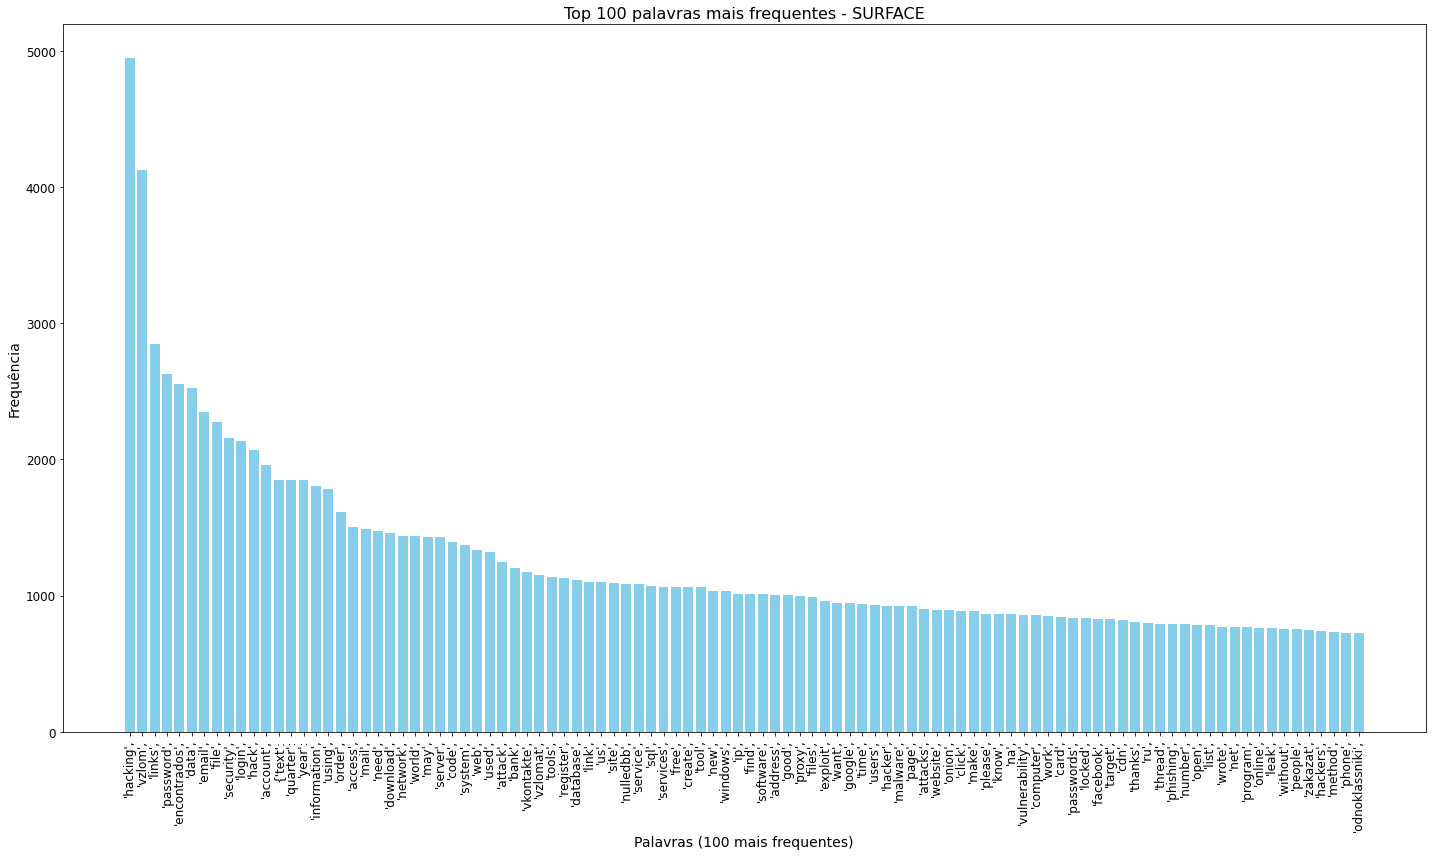

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Clean the documents by converting to string and removing any empty documents
documents_cleaned = [str(doc) for doc in documents if doc]

# Join all the cleaned documents into a single text
text = ' '.join(documents_cleaned)

# Split the text into words (splitting on whitespace)
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Extract the top 100 most frequent words
top_words = word_counts.most_common(100)

# Extract the words and their counts
word_list, count_list = zip(*top_words)

# Display the top words with their counts in a structured format
print("Top 100 palavras mais frequentes:")
print("-----------------------------------")
for i, (word, count) in enumerate(zip(word_list, count_list), start=1):
    print(f"{i}. {word}: {count}")

# Save the numbered list of words with counts to a text file
#output_file = f"../quarters/surface/{quarter}/100_lista_palavras_mais_frequentes_{quarter}_relevantes.txt"
output_file = f"../totalData/surface/total/100_lista_palavras_mais_frequentes_SURFACE_relevantes.txt"
with open(output_file, "w+", encoding="utf-8") as file:
    file.write("Top 100 palavras mais frequentes:\n")
    file.write("-----------------------------------\n")
    for i, (word, count) in enumerate(zip(word_list, count_list), start=1):
        file.write(f"{i}. {word}: {count}\n")

# To display the word counts in a bar chart
plt.figure(figsize=(20, 12))
plt.bar(word_list, count_list, color='skyblue')
plt.xlabel('Palavras (100 mais frequentes)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title(f"Top 100 palavras mais frequentes - SURFACE", fontsize=16)
plt.tight_layout()

# Save the bar chart as a PNG file
plt.savefig(f"../totalData/surface/total/100_palavras_mais_frequentes_SURFACE_relevantes.png", dpi=500)
plt.show()
